### Example Given by Homework Publisher （not for use)

LOAD DATA 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm

ModuleNotFoundError: No module named 'numpy'

In [30]:

data_path = 'task2_data'
file_count = len(os.listdir(data_path))

print(f"The number of scenarios under {data_path} is: {file_count}")

The number of files under task2_data is: 287


In [31]:
#########Your can use the following code for reference to load the data and visualize the scenario and agents#########
for file in tqdm(os.listdir(data_path)):

    info = np.load(data_path+'/'+file,allow_pickle=True)
    all_agent_trajs        = info['all_agent']    
    
    # You can run below code to see the shape of the all_agent_trajs
    # print("agents matrix shape is: ",all_agent_trajs.shape)  
    # agents matrix shape is:  (Na, 91, 10)
    # [Na agents, 91 timesteps the interval between each timestep is 0.1 second,\
    #10 denotes [center_x, center_y, center_z, boundingbox_x, boundingbox_y, boundingbox_z, heading, vel_x, vel_y, valid] ]
    #the valid flag is either 0 or 1 ; 1 means the valid, 0 means invalid
    obj_types              = info['object_type']
    lane_polylines         = info['lane']           #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    road_polylines         = info['road_polylines'] #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    crosswalk_polylines    = info['crosswalk']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    speed_bump_polylines   = info['speed_bump']     #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    stop_signs_polylines   = info['stop_sign']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    drive_way_polylines    = info['drive_way']      #  list of [n,7] array [x,y,z,ori_x,ori_y,ori_z,type]
    sdc_track_id           = info['sdc_track_index']   #  the track id of the sdc
    scenario_id            = info['scenario_id']
    
    # We select the 11th timestep as the current timestep to predict the future trajectory of the agents
    all_agent_current = all_agent_trajs[:,10]
    # print(all_agent_current.shape)
    
    #ground truth for the future 3s,5s,8s can be easily derived by :
    predict_horizon = 80
    all_gt_future=all_agent_trajs[:,11:11+predict_horizon]
    all_gt_future.shape
    
    tracks        = info['predict_list']   # the list of agent ids to predict, the agent id is the index in the all_agent_trajs
    tracks
    agents_to_predict = all_agent_trajs[tracks]
    ######################################################
    # The homework should be done on these agents_to_predict.
    # Visualize the agents_to_predict and the scenarios
    # You can use the following code to visualize the scenario
    # For agnets, you can use black color to represent the agents not in the tracks to predict, and use different colors for agents_to_predict
    # You can draw each agent as a rectangle, the center of the rectangle is the center_x and center_y, 
    # and the length and width of the rectangle is boundingbox_x and boundingbox_y
    # We provide a example fig for your reference.   example.png
    sdc_current_state = all_agent_trajs[sdc_track_id][10]
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_facecolor('xkcd:grey') 
    ax.set_facecolor('xkcd:grey')
    for polyline in road_polylines:
        map_type = polyline[0,6]
        if map_type == 6:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
        elif map_type == 7:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 8:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        elif map_type == 9:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 10:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
        elif map_type == 11:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 12:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
        elif map_type == 13:
            plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
        elif map_type == 15:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
        elif map_type == 16:
            plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
    # 'TYPE_FREEWAY': 1,
    # 'TYPE_SURFACE_STREET': 2,
    # 'TYPE_BIKE_LANE': 3,

    # # for roadline
    # 'TYPE_UNKNOWN': -1,
    # 'TYPE_BROKEN_SINGLE_WHITE': 6,
    # 'TYPE_SOLID_SINGLE_WHITE': 7,
    # 'TYPE_SOLID_DOUBLE_WHITE': 8,
    # 'TYPE_BROKEN_SINGLE_YELLOW': 9,
    # 'TYPE_BROKEN_DOUBLE_YELLOW': 10,
    # 'TYPE_SOLID_SINGLE_YELLOW': 11,
    # 'TYPE_SOLID_DOUBLE_YELLOW': 12,
    # 'TYPE_PASSING_DOUBLE_YELLOW': 13,

    # # for roadedge
    # 'TYPE_ROAD_EDGE_BOUNDARY': 15,
    # 'TYPE_ROAD_EDGE_MEDIAN': 16,

    # # for stopsign
    # 'TYPE_STOP_SIGN': 17,

    # # for crosswalk
    # 'TYPE_CROSSWALK': 18,

    # # for speed bump
    # 'TYPE_SPEED_BUMP': 19,
    
    # # for driveway
    # 'TYPE_DRIVEWAY': 20,
    ax.axis([-70+ sdc_current_state[0], 70+ sdc_current_state[0], -70+ sdc_current_state[1], 70 + sdc_current_state[1]])

    filename = f'visualization/{scenario_id}.png' 
    plt.savefig(filename)       
    plt.close()

100%|██████████| 287/287 [00:27<00:00, 10.62it/s]


### Q1. Use a constant velocity model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

ADE(3s) = 1.775 , ADE(5s) = 4.467, ADE(8s) = 9.400
FDE(3s) = 4.815 , FDE(5s) =  12.333, FDE(8s) = 25.751

In [2]:
# Code for Q1
# By running this code it will generate the visualization of the scenario and agents within the visualization_CV folder.
# The constant velocity trajectories of agents predicted for all time horizons will be displayed in the visualization.
# The print statement will show the ADE and FDE for each prediction horizon across all target agents and scenarios.
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
import matplotlib.transforms as transforms

# Data path and file statistics
data_path = 'task2_data'
file_list = os.listdir(data_path)
file_count = len(file_list)
print(f"The number of scenarios under {data_path} is: {file_count}")

# Define the list of prediction horizons (in number of steps)
horizons = [30, 50, 80]

# Used to store the error of all target agents in all scenarios, keyed by prediction horizon
overall_ADE = {h: [] for h in horizons}
overall_FDE = {h: [] for h in horizons}

# Using a 'with' statement to create a tqdm object, ensuring the progress bar updates on one line
with tqdm(file_list, desc="Processing scenarios", leave=True) as pbar:
    for file in pbar:
        # Load current scenario data
        info = np.load(os.path.join(data_path, file), allow_pickle=True)
        all_agent_trajs = info['all_agent']
        # Select the 11th time step as the current state (index 10)
        all_agent_current = all_agent_trajs[:, 10]
        
        # Get the indices of agents to be predicted (stored in 'predict_list')
        tracks = info['predict_list']
        agents_current = all_agent_trajs[tracks, 10, :]  # current state at t=10
        # For constant velocity model, state at t=9 is not needed
        dt = 0.1
        pred_trajs_dict = {}   # Save predicted trajectories for the current horizon for later visualization
        
        # Compute predictions for each prediction horizon
        for h in horizons:
            # Copy ground truth data to prevent later overwriting
            all_gt_future = np.copy(all_agent_trajs[:, 11:11+h])
            
            # Predict future trajectory using constant velocity model (only predict center x, y)
            pred_trajs = np.zeros((len(tracks), h, 2))
            for i, state in enumerate(agents_current):
                # If the current state is invalid, skip prediction (fill with nan)
                if state[9] != 1:
                    pred_trajs[i, :, :] = np.nan
                    continue
                x0 = state[0]      # current center x
                y0 = state[1]      # current center y
                vx = state[7]      # current x-direction velocity
                vy = state[8]      # current y-direction velocity
                for t in range(1, h+1):
                    t_total = t * dt
                    pred_x = x0 + vx * t_total
                    pred_y = y0 + vy * t_total
                    pred_trajs[i, t-1, :] = [pred_x, pred_y]
            
            # Compute ADE and FDE
            gt_future = all_gt_future[tracks, :, 0:2]  # ground truth positions (x, y)
            valid_future = all_gt_future[tracks, :, 9]   # validity flag for each future time step
            displacement_errors = pred_trajs - gt_future
            error_magnitudes = np.linalg.norm(displacement_errors, axis=-1)
            # Set error to nan for invalid time steps (valid==0)
            error_magnitudes_masked = np.where(valid_future==1, error_magnitudes, np.nan)
            
            # Compute ADE for each agent (mean error over valid time steps)
            ADE_per_agent = np.nanmean(error_magnitudes_masked, axis=1)
            
            # Compute FDE for each agent: use the error at the last valid time step
            FDE_per_agent = []
            for i in range(error_magnitudes.shape[0]):
                valid_indices = np.where(valid_future[i] == 1)[0]
                if len(valid_indices) > 0:
                    last_valid_index = valid_indices[-1]
                    FDE_per_agent.append(error_magnitudes[i, last_valid_index])
                else:
                    FDE_per_agent.append(np.nan)
            FDE_per_agent = np.array(FDE_per_agent)
            
            # Accumulate current scenario's errors into global lists
            overall_ADE[h].extend(ADE_per_agent.tolist())
            overall_FDE[h].extend(FDE_per_agent.tolist())
            
            # Save predicted trajectories for the current horizon for later visualization
            pred_trajs_dict[h] = pred_trajs
        
        # --------------------------------------
        # Visualization section: display predicted results for all horizons
        # --------------------------------------
        obj_types            = info['object_type']
        lane_polylines       = info['lane']
        road_polylines       = info['road_polylines']
        crosswalk_polylines  = info['crosswalk']
        speed_bump_polylines = info['speed_bump']
        stop_signs_polylines = info['stop_sign']
        drive_way_polylines  = info['drive_way']
        sdc_track_id         = info['sdc_track_index']
        scenario_id          = info['scenario_id']
        
        sdc_current_state = all_agent_trajs[sdc_track_id][10]
        
        ax = plt.gca()
        fig = plt.gcf()
        fig.set_facecolor('xkcd:grey') 
        ax.set_facecolor('xkcd:grey')
        
        # Plot road polylines
        for polyline in road_polylines:
            map_type = polyline[0, 6]
            if map_type == 6:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
            elif map_type == 7:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 8:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 9:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 10:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 11:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 12:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 13:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
            elif map_type == 15:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 16:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 18:
                plt.plot(polyline[:, 0], polyline[:, 1], color='yellow', linestyle='dashed', linewidth=2)
                
        # Plot lane polylines
        for polyline in lane_polylines:
            map_type = polyline[0, 6]
            if map_type == 1:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 2:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 3:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
                
        # Plot stop signs
        for polyline in stop_signs_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'r', marker='o', markersize=5, linestyle='None')

        # Plot crosswalks and ensure the first and last points are connected
        for polyline in crosswalk_polylines:
            # Check if polyline is closed; if not, close it by appending the first point
            if not np.array_equal(polyline[0], polyline[-1]):
                polyline_closed = np.vstack([polyline, polyline[0]])
            else:
                polyline_closed = polyline
            plt.plot(polyline_closed[:, 0], polyline_closed[:, 1], 'b', linestyle='solid', linewidth=1)
            
        # Plot speed bumps
        for polyline in speed_bump_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'orange', linestyle='solid', linewidth=1)
            
        # Plot drive ways
        for polyline in drive_way_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        
        # Set the axis range centered on SDC's current position
        ax.axis([-70 + sdc_current_state[0], 70 + sdc_current_state[0], 
                 -70 + sdc_current_state[1], 70 + sdc_current_state[1]])
        
        # Plot all agents (with heading information)
        Na = all_agent_trajs.shape[0]
        for i in range(Na):
            state = all_agent_trajs[i][10]
            cx, cy = state[0], state[1]
            bx, by = state[3], state[4]
            heading_rad = state[6]
            heading_deg = np.degrees(heading_rad)
            valid = state[9]  # validity flag of the current state
            trans = transforms.Affine2D().rotate_deg(heading_deg).translate(cx, cy) + ax.transData
            if i in tracks:
                # For predicted agent: if valid, fill with red; otherwise, use red dotted border
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='r', linewidth=2)
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='none', linestyle='dotted', linewidth=2)
            else:
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='black', facecolor='black')
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='gray', facecolor='none', linestyle='dotted', linewidth=1)
            
            rect.set_transform(trans)
            ax.add_patch(rect)
        
        # Plot groundtruth trajectories (up to horizon 80), only for predicted agents with valid current state,
        # and only plot continuous segments in the future where valid==1
        first_gt = True
        for idx, track in enumerate(tracks):
            if all_agent_trajs[track][10][9] != 1:
                continue
            gt_traj = all_agent_trajs[track, 11:11+80, 0:2]  # groundtruth positions (x, y)
            valid_future = all_agent_trajs[track, 11:11+80, 9]   # validity flag for future steps
            start_idx = None
            for j in range(len(valid_future)):
                if valid_future[j] == 1 and start_idx is None:
                    start_idx = j
                if (valid_future[j] != 1 or j == len(valid_future)-1) and start_idx is not None:
                    end_idx = j if valid_future[j] != 1 else j+1
                    segment = gt_traj[start_idx:end_idx]
                    if len(segment) > 1:
                        if first_gt:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5, label="Groundtruth (8s)")
                            first_gt = False
                        else:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5)
                    start_idx = None
        
        # Define colors for different prediction horizons:
        # Prediction horizon 30: green, 50: light blue, 80: purple
        colors = {30: 'green', 50: 'lightblue', 80: 'purple'}
        # Plot predicted trajectories for all target agents (only valid states, using solid lines)
        for h, pred_trajs in pred_trajs_dict.items():
            for idx, i in enumerate(tracks):
                if all_agent_trajs[i][10][9] != 1:
                    continue
                pred_traj = pred_trajs[idx]  # predicted trajectory for the current agent at horizon h
                # Label with seconds (e.g. 30 steps -> 3s)
                if idx == 0:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='-', color=colors[h], linewidth=1, label=f"Pred {int(h*dt)}s")
                else:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='-', color=colors[h], linewidth=1)
                # Add an arrow at the end of the trajectory to indicate direction
                x_start, y_start = pred_traj[-2, 0], pred_traj[-2, 1]
                x_end, y_end = pred_traj[-1, 0], pred_traj[-1, 1]
                dx = x_end - x_start
                dy = y_end - y_start
                ax.arrow(x_start, y_start, dx, dy, head_width=2, head_length=3, fc=colors[h], ec=colors[h])
        
        plt.legend()
        vis_filename = f'visualization_CV/{scenario_id}.png'
        plt.savefig(vis_filename)
        plt.close()
        
        # Optionally update the progress bar information to show the average error for all agents in the current scenario
        scenario_metrics_str = {}
        for h in horizons:
            current_ADE = overall_ADE[h][-len(tracks):]
            current_FDE = overall_FDE[h][-len(tracks):]
            scenario_metrics_str[f"ADE_{h}"] = round(np.nanmean(current_ADE), 2)
            scenario_metrics_str[f"FDE_{h}"] = round(np.nanmean(current_FDE), 2)
        pbar.set_postfix({"scenario": scenario_id, **scenario_metrics_str})

# Compute and print the overall average error across all target agents and scenarios for each prediction horizon
for h in horizons:
    overall_mean_ADE = np.nanmean(overall_ADE[h])
    overall_mean_FDE = np.nanmean(overall_FDE[h])
    print(f"Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon {h}: {overall_mean_ADE}")
    print(f"Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon {h}: {overall_mean_FDE}")


The number of scenarios under task2_data is: 287


Processing scenarios:  33%|███▎      | 96/287 [01:35<03:47,  1.19s/it, scenario=56ddb7d510247344, ADE_30=2.85, FDE_30=8.15, ADE_50=7.61, FDE_50=21.1, ADE_80=16.4, FDE_80=39.5]C:\Users\BOSS CAI\AppData\Local\Temp\ipykernel_3268\4082753765.py:243: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(vis_filename)
Processing scenarios: 100%|██████████| 287/287 [04:58<00:00,  1.04s/it, scenario=fe38b8af0cbadcd0, ADE_30=0.61, FDE_30=1.7, ADE_50=1.36, FDE_50=3.01, ADE_80=2.31, FDE_80=7.98] 

Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 30: 1.774770978538524
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 30: 4.815347051333821
Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 50: 4.467095103905605
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 50: 12.333537638120875
Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 80: 9.400351148677773
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 80: 25.75123408101311


ADE| ADE(3s) | ADE(5s) | ADE(8s) |
FDE| FDE(3s) | FDE(5s) | FDE(8s) |

### Q2. Use a constant acceleration model to predict the future trajectories of the target agents at 3s, 5s, and 8s. Then, calculate the Average Displacement Error (ADE) and Final Displacement Error (FDE). The results should be averaged across all target agents and scenarios.

ADE(3s) = 5.260 , ADE(5s) = 14.198, ADE(8s) = 32.244
FDE(3s) = 14.838 , FDE(5s) = 41.377, FDE(8s) = 95.486

In [3]:
# Code for Q2
# By running this code it will generate the visualization of the scenario and agents within the visualization_CA folder.
# The constant acceleration trajectories of agents predicted for all time horizons will be displayed in the visualization.
# The print statement will show the ADE and FDE for each prediction horizon across all target agents and scenarios.

import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
import matplotlib.transforms as transforms

# Data path and file statistics
data_path = 'task2_data'
file_list = os.listdir(data_path)
file_count = len(file_list)
print(f"The number of scenarios under {data_path} is: {file_count}")

# Define the list of prediction horizons (in number of steps)
horizons = [30, 50, 80]

# Used to store the error of all target agents in all scenarios, keyed by prediction horizon
overall_ADE = {h: [] for h in horizons}
overall_FDE = {h: [] for h in horizons}

# Using a 'with' statement to create a tqdm object, ensuring the progress bar updates on one line
with tqdm(file_list, desc="Processing scenarios", leave=True) as pbar:
    for file in pbar:
        # Load current scenario data
        info = np.load(os.path.join(data_path, file), allow_pickle=True)
        all_agent_trajs = info['all_agent']
        # Select the 11th time step as the current state (index 10)
        all_agent_current = all_agent_trajs[:, 10]
        
        # Get the indices of agents to be predicted (stored in 'predict_list')
        tracks = info['predict_list']
        agents_current = all_agent_trajs[tracks, 10, :]  # current state at t=10
        # For acceleration estimation, get previous state at t=9
        agents_previous = all_agent_trajs[tracks, 9, :]
        
        dt = 0.1
        pred_trajs_dict = {}   # Save predicted trajectories for the current horizon for later visualization
        
        # Compute predictions for each prediction horizon
        for h in horizons:
            # Copy ground truth data to prevent later overwriting
            all_gt_future = np.copy(all_agent_trajs[:, 11:11+h])
            
            # Predict future trajectory using constant acceleration model (only predict center x, y)
            pred_trajs = np.zeros((len(tracks), h, 2))
            for i, state in enumerate(agents_current):
                # If the current state is invalid, skip prediction (fill with nan)
                if state[9] != 1:
                    pred_trajs[i, :, :] = np.nan
                    continue
                x0 = state[0]      # current center x
                y0 = state[1]      # current center y
                vx = state[7]      # current x-direction velocity
                vy = state[8]      # current y-direction velocity
                # Estimate acceleration (using velocity at t=9 and t=10)
                vx_prev = agents_previous[i, 7]
                vy_prev = agents_previous[i, 8]
                a_x = (vx - vx_prev) / dt
                a_y = (vy - vy_prev) / dt
                for t in range(1, h+1):
                    t_total = t * dt
                    pred_x = x0 + vx * t_total + 0.5 * a_x * t_total**2
                    pred_y = y0 + vy * t_total + 0.5 * a_y * t_total**2
                    pred_trajs[i, t-1, :] = [pred_x, pred_y]
            
            # Compute ADE and FDE
            gt_future = all_gt_future[tracks, :, 0:2]  # ground truth positions (x, y)
            valid_future = all_gt_future[tracks, :, 9]   # validity flag for each future time step
            displacement_errors = pred_trajs - gt_future
            error_magnitudes = np.linalg.norm(displacement_errors, axis=-1)
            # Set error to nan for invalid time steps (valid==0)
            error_magnitudes_masked = np.where(valid_future==1, error_magnitudes, np.nan)
            
            # Compute ADE for each agent (mean error over valid time steps)
            ADE_per_agent = np.nanmean(error_magnitudes_masked, axis=1)
            
            # Compute FDE for each agent: use the error at the last valid time step
            FDE_per_agent = []
            for i in range(error_magnitudes.shape[0]):
                valid_indices = np.where(valid_future[i] == 1)[0]
                if len(valid_indices) > 0:
                    last_valid_index = valid_indices[-1]
                    FDE_per_agent.append(error_magnitudes[i, last_valid_index])
                else:
                    FDE_per_agent.append(np.nan)
            FDE_per_agent = np.array(FDE_per_agent)
            
            # Accumulate current scenario's errors into global lists
            overall_ADE[h].extend(ADE_per_agent.tolist())
            overall_FDE[h].extend(FDE_per_agent.tolist())
            
            # Save predicted trajectories for the current horizon for later visualization
            pred_trajs_dict[h] = pred_trajs
        
        # --------------------------------------
        # Visualization section: display predicted results for all horizons (only plot valid trajectories)
        # --------------------------------------
        obj_types            = info['object_type']
        lane_polylines       = info['lane']
        road_polylines       = info['road_polylines']
        crosswalk_polylines  = info['crosswalk']
        speed_bump_polylines = info['speed_bump']
        stop_signs_polylines = info['stop_sign']
        drive_way_polylines  = info['drive_way']
        sdc_track_id         = info['sdc_track_index']
        scenario_id          = info['scenario_id']
        
        sdc_current_state = all_agent_trajs[sdc_track_id][10]
        
        ax = plt.gca()
        fig = plt.gcf()
        fig.set_facecolor('xkcd:grey') 
        ax.set_facecolor('xkcd:grey')
        
        # Plot road polylines
        for polyline in road_polylines:
            map_type = polyline[0, 6]
            if map_type == 6:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
            elif map_type == 7:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 8:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 9:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 10:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 11:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 12:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 13:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
            elif map_type == 15:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 16:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 18:
                plt.plot(polyline[:, 0], polyline[:, 1], color='yellow', linestyle='dashed', linewidth=2)
                
        # Plot lane polylines
        for polyline in lane_polylines:
            map_type = polyline[0, 6]
            if map_type == 1:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 2:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 3:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
                
        # Plot stop signs
        for polyline in stop_signs_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'r', marker='o', markersize=5, linestyle='None')

        # Plot crosswalks and ensure the polyline is closed by connecting the first and last points
        for polyline in crosswalk_polylines:
            if not np.array_equal(polyline[0], polyline[-1]):
                polyline_closed = np.vstack([polyline, polyline[0]])
            else:
                polyline_closed = polyline
            plt.plot(polyline_closed[:, 0], polyline_closed[:, 1], 'b', linestyle='solid', linewidth=1)
            
        # Plot speed bumps
        for polyline in speed_bump_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'orange', linestyle='solid', linewidth=1)
            
        # Plot drive ways
        for polyline in drive_way_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        
        # Set the axis range centered on SDC's current position
        ax.axis([-70 + sdc_current_state[0], 70 + sdc_current_state[0], 
                 -70 + sdc_current_state[1], 70 + sdc_current_state[1]])
        
        # Plot all agents (with heading information)
        Na = all_agent_trajs.shape[0]
        for i in range(Na):
            state = all_agent_trajs[i][10]
            cx, cy = state[0], state[1]
            bx, by = state[3], state[4]
            heading_rad = state[6]
            heading_deg = np.degrees(heading_rad)
            valid = state[9]  # validity flag of the current state
            trans = transforms.Affine2D().rotate_deg(heading_deg).translate(cx, cy) + ax.transData
            if i in tracks:
                # For predicted agent: if valid, fill with red; otherwise, use red dotted border
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='r', linewidth=2)
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='none', linestyle='dotted', linewidth=2)
            else:
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='black', facecolor='black')
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='gray', facecolor='none', linestyle='dotted', linewidth=1)
            
            rect.set_transform(trans)
            ax.add_patch(rect)
        
        # Plot groundtruth trajectories (up to horizon 80), only for predicted agents with valid current state,
        # and only plot continuous segments in the future where valid==1
        first_gt = True
        for idx, track in enumerate(tracks):
            if all_agent_trajs[track][10][9] != 1:
                continue
            gt_traj = all_agent_trajs[track, 11:11+80, 0:2]  # groundtruth positions (x, y)
            valid_future = all_agent_trajs[track, 11:11+80, 9]   # validity flag for future steps
            start_idx = None
            for j in range(len(valid_future)):
                if valid_future[j] == 1 and start_idx is None:
                    start_idx = j
                # End current segment if invalid or at the end
                if (valid_future[j] != 1 or j == len(valid_future)-1) and start_idx is not None:
                    end_idx = j if valid_future[j] != 1 else j+1
                    segment = gt_traj[start_idx:end_idx]
                    if len(segment) > 1:
                        if first_gt:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5, label="Groundtruth (8s)")
                            first_gt = False
                        else:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5)
                    start_idx = None
        
        # Define colors for different prediction horizons (colors kept as original)
        colors = {30: 'r', 50: 'g', 80: 'purple'}
        # Plot predicted trajectories for all target agents (only valid agents, using dashed lines)
        for h, pred_trajs in pred_trajs_dict.items():
            for idx, i in enumerate(tracks):
                if all_agent_trajs[i][10][9] != 1:
                    continue
                pred_traj = pred_trajs[idx]  # predicted trajectory for the current agent at horizon h
                if idx == 0:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='--', color=colors[h], linewidth=1, label=f"Pred {int(h*dt)}s")
                else:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='--', color=colors[h], linewidth=1)
                # Add an arrow at the end of the trajectory to indicate direction
                x_start, y_start = pred_traj[-2, 0], pred_traj[-2, 1]
                x_end, y_end = pred_traj[-1, 0], pred_traj[-1, 1]
                dx = x_end - x_start
                dy = y_end - y_start
                ax.arrow(x_start, y_start, dx, dy, head_width=2, head_length=3, fc=colors[h], ec=colors[h])
        
        plt.legend()
        vis_filename = f'visualization_CA/{scenario_id}.png'
        plt.savefig(vis_filename)
        plt.close()
        
        # Optionally update the progress bar information to show the average error for all agents in the current scenario
        scenario_metrics_str = {}
        for h in horizons:
            current_ADE = overall_ADE[h][-len(tracks):]
            current_FDE = overall_FDE[h][-len(tracks):]
            scenario_metrics_str[f"ADE_{h}"] = round(np.nanmean(current_ADE), 2)
            scenario_metrics_str[f"FDE_{h}"] = round(np.nanmean(current_FDE), 2)
        pbar.set_postfix({"scenario": scenario_id, **scenario_metrics_str})

# Compute and print the overall average error across all target agents and scenarios for each prediction horizon
for h in horizons:
    overall_mean_ADE = np.nanmean(overall_ADE[h])
    overall_mean_FDE = np.nanmean(overall_FDE[h])
    print(f"Mean ADE with Constant Acceleration Model across all target agents and scenarios for time horizon {h}: {overall_mean_ADE}")
    print(f"Mean FDE with Constant Acceleration Model across all target agents and scenarios for time horizon {h}: {overall_mean_FDE}")


The number of scenarios under task2_data is: 287


Processing scenarios: 100%|██████████| 287/287 [05:08<00:00,  1.08s/it, scenario=fe38b8af0cbadcd0, ADE_30=3.63, FDE_30=10.6, ADE_50=9.88, FDE_50=30, ADE_80=17.6, FDE_80=56.2]  

Mean ADE with Constant Acceleration Model across all target agents and scenarios for time horizon 30: 5.260264250944235
Mean FDE with Constant Acceleration Model across all target agents and scenarios for time horizon 30: 14.838097140390433
Mean ADE with Constant Acceleration Model across all target agents and scenarios for time horizon 50: 14.197689426966502
Mean FDE with Constant Acceleration Model across all target agents and scenarios for time horizon 50: 41.37652327747742
Mean ADE with Constant Acceleration Model across all target agents and scenarios for time horizon 80: 32.24363444457698
Mean FDE with Constant Acceleration Model across all target agents and scenarios for time horizon 80: 95.48625320415023


ADE| ADE(3s) | ADE(5s) | ADE(8s) |
FDE| FDE(3s) | FDE(5s) | FDE(8s) |

## Q3. Briefly discuss the observations from your results. 

### Map Visualization for 10 Random Scenarios

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import random
from tqdm import tqdm
import matplotlib.transforms as transforms

# Data path and file statistics
data_path = 'task2_data'
file_list = os.listdir(data_path)
file_count = len(file_list)
print(f"The number of scenarios under {data_path} is: {file_count}")

# Randomly select 10 scenarios
selected_files = random.sample(file_list, min(10, file_count))

# Define the list of prediction horizons (in number of steps)
horizons = [30, 50, 80]

# Used to store the error of all target agents in all scenarios, keyed by prediction horizon
overall_ADE = {h: [] for h in horizons}
overall_FDE = {h: [] for h in horizons}

dt = 0.1

# Using a 'with' statement to create a tqdm object, ensuring the progress bar updates on one line
with tqdm(selected_files, desc="Processing scenarios", leave=True) as pbar:
    for file in pbar:
        # Load current scenario data
        info = np.load(os.path.join(data_path, file), allow_pickle=True)
        all_agent_trajs = info['all_agent']
        # Select the 11th time step as the current state (index 10)
        all_agent_current = all_agent_trajs[:, 10]
        
        # Get the indices of agents to be predicted (stored in 'predict_list')
        tracks = info['predict_list']
        agents_current = all_agent_trajs[tracks, 10, :]  # current state at t=10
        
        # For acceleration prediction, get the state at t=9
        agents_prev = all_agent_trajs[tracks, 9, :]

        # For constant velocity model, save predicted trajectories for later visualization
        pred_trajs_dict = {}
        # Also compute constant acceleration model predicted trajectories and save in acc_pred_trajs_dict
        acc_pred_trajs_dict = {}
        
        # Compute predictions for each prediction horizon
        for h in horizons:
            # --------------Constant Velocity Prediction--------------
            # Copy ground truth data to prevent later overwriting
            all_gt_future = np.copy(all_agent_trajs[:, 11:11+h])
            
            # Predict future trajectory using constant velocity model (only predict center x, y)
            pred_trajs = np.zeros((len(tracks), h, 2))
            for i, state in enumerate(agents_current):
                # If current state is invalid, skip prediction (fill with nan)
                if state[9] != 1:
                    pred_trajs[i, :, :] = np.nan
                    continue
                x0 = state[0]      # current center x
                y0 = state[1]      # current center y
                vx = state[7]      # current x-direction velocity
                vy = state[8]      # current y-direction velocity
                for t in range(1, h+1):
                    t_total = t * dt
                    pred_x = x0 + vx * t_total
                    pred_y = y0 + vy * t_total
                    pred_trajs[i, t-1, :] = [pred_x, pred_y]
            
            # Compute ADE and FDE
            gt_future = all_gt_future[tracks, :, 0:2]  # ground truth positions (x, y)
            valid_future = all_gt_future[tracks, :, 9]   # validity flag for each future time step
            displacement_errors = pred_trajs - gt_future
            error_magnitudes = np.linalg.norm(displacement_errors, axis=-1)
            # Set error to nan for invalid time steps (valid==0)
            error_magnitudes_masked = np.where(valid_future==1, error_magnitudes, np.nan)
            
            # Compute ADE for each agent (mean error over valid time steps)
            ADE_per_agent = np.nanmean(error_magnitudes_masked, axis=1)
            
            # Compute FDE for each agent: use the error at the last valid time step
            FDE_per_agent = []
            for i in range(error_magnitudes.shape[0]):
                valid_indices = np.where(valid_future[i] == 1)[0]
                if len(valid_indices) > 0:
                    last_valid_index = valid_indices[-1]
                    FDE_per_agent.append(error_magnitudes[i, last_valid_index])
                else:
                    FDE_per_agent.append(np.nan)
            FDE_per_agent = np.array(FDE_per_agent)
            
            # Accumulate current scenario errors into global lists
            overall_ADE[h].extend(ADE_per_agent.tolist())
            overall_FDE[h].extend(FDE_per_agent.tolist())
            
            # Save constant velocity predicted trajectories
            pred_trajs_dict[h] = pred_trajs
            
            # --------------Constant Acceleration Prediction--------------
            # Use state at t=10 and t=9 to compute acceleration
            acc_pred_trajs = np.zeros((len(tracks), h, 2))
            for i, state in enumerate(agents_current):
                # If current state is invalid, skip prediction
                if state[9] != 1:
                    acc_pred_trajs[i, :, :] = np.nan
                    continue
                # Get corresponding t=9 state
                state_prev = agents_prev[i]
                if state_prev[9] != 1:
                    acc_pred_trajs[i, :, :] = np.nan
                    continue
                x0 = state[0]
                y0 = state[1]
                vx0 = state[7]
                vy0 = state[8]
                # Compute acceleration
                vx_prev = state_prev[7]
                vy_prev = state_prev[8]
                ax_val = (vx0 - vx_prev) / dt
                ay_val = (vy0 - vy_prev) / dt
                for t in range(1, h+1):
                    t_total = t * dt
                    acc_pred_x = x0 + vx0 * t_total + 0.5 * ax_val * t_total**2
                    acc_pred_y = y0 + vy0 * t_total + 0.5 * ay_val * t_total**2
                    acc_pred_trajs[i, t-1, :] = [acc_pred_x, acc_pred_y]
            acc_pred_trajs_dict[h] = acc_pred_trajs
        
        # --------------------------------------
        # Visualization section: display predicted results for all horizons
        # --------------------------------------
        obj_types            = info['object_type']
        lane_polylines       = info['lane']
        road_polylines       = info['road_polylines']
        crosswalk_polylines  = info['crosswalk']
        speed_bump_polylines = info['speed_bump']
        stop_signs_polylines = info['stop_sign']
        drive_way_polylines  = info['drive_way']
        sdc_track_id         = info['sdc_track_index']
        scenario_id          = info['scenario_id']
        
        sdc_current_state = all_agent_trajs[sdc_track_id][10]
        
        ax = plt.gca()
        fig = plt.gcf()
        fig.set_facecolor('xkcd:grey') 
        ax.set_facecolor('xkcd:grey')
        
        # Plot road polylines
        for polyline in road_polylines:
            map_type = polyline[0, 6]
            if map_type == 6:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='dashed', linewidth=1)
            elif map_type == 7:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 8:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 9:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 10:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dashed', linewidth=1)
            elif map_type == 11:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 12:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='solid', linewidth=1)
            elif map_type == 13:
                plt.plot(polyline[:, 0], polyline[:, 1], 'xkcd:yellow', linestyle='dotted', linewidth=1)
            elif map_type == 15:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 16:
                plt.plot(polyline[:, 0], polyline[:, 1], 'k', linewidth=1)
            elif map_type == 18:
                plt.plot(polyline[:, 0], polyline[:, 1], color='yellow', linestyle='dashed', linewidth=2)
                
        # Plot lane polylines
        for polyline in lane_polylines:
            map_type = polyline[0, 6]
            if map_type == 1:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 2:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
            elif map_type == 3:
                plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
                
        # Plot stop signs
        for polyline in stop_signs_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'r', marker='o', markersize=5, linestyle='None')

        # Plot crosswalks and ensure the polyline is closed by connecting the first and last points
        for polyline in crosswalk_polylines:
            if not np.array_equal(polyline[0], polyline[-1]):
                polyline_closed = np.vstack([polyline, polyline[0]])
            else:
                polyline_closed = polyline
            plt.plot(polyline_closed[:, 0], polyline_closed[:, 1], 'b', linestyle='solid', linewidth=1)
            
        # Plot speed bumps
        for polyline in speed_bump_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'orange', linestyle='solid', linewidth=1)
            
        # Plot drive ways
        for polyline in drive_way_polylines:
            plt.plot(polyline[:, 0], polyline[:, 1], 'w', linestyle='solid', linewidth=1)
        
        # Set the axis range centered on SDC's current position
        ax.axis([-70 + sdc_current_state[0], 70 + sdc_current_state[0], 
                 -70 + sdc_current_state[1], 70 + sdc_current_state[1]])
        
        # Plot all agents (with heading information)
        Na = all_agent_trajs.shape[0]
        for i in range(Na):
            state = all_agent_trajs[i][10]
            cx, cy = state[0], state[1]
            bx, by = state[3], state[4]
            heading_rad = state[6]
            heading_deg = np.degrees(heading_rad)
            valid = state[9]  # validity flag of the current state
            trans = transforms.Affine2D().rotate_deg(heading_deg).translate(cx, cy) + ax.transData
            if i in tracks:
                # For predicted agent: if valid, fill with red; otherwise, use red dotted border
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='r', linewidth=2)
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='r', facecolor='none', linestyle='dotted', linewidth=2)
            else:
                if valid == 1:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='black', facecolor='black')
                else:
                    rect = plt.Rectangle((-bx/2, -by/2), bx, by, edgecolor='gray', facecolor='none', linestyle='dotted', linewidth=1)
            
            rect.set_transform(trans)
            ax.add_patch(rect)
        
        # Plot groundtruth trajectories (up to horizon 80), only for predicted agents with valid current state,
        # and only plot continuous segments in the future where valid==1
        first_gt = True
        for idx, track in enumerate(tracks):
            if all_agent_trajs[track][10][9] != 1:
                continue
            gt_traj = all_agent_trajs[track, 11:11+80, 0:2]  # groundtruth positions (x, y)
            valid_future = all_agent_trajs[track, 11:11+80, 9]   # validity flag for future steps
            start_idx = None
            for j in range(len(valid_future)):
                if valid_future[j] == 1 and start_idx is None:
                    start_idx = j
                if (valid_future[j] != 1 or j == len(valid_future)-1) and start_idx is not None:
                    end_idx = j if valid_future[j] != 1 else j+1
                    segment = gt_traj[start_idx:end_idx]
                    if len(segment) > 1:
                        if first_gt:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5, label="Groundtruth (8s)")
                            first_gt = False
                        else:
                            plt.plot(segment[:, 0], segment[:, 1], linestyle='-', color='red', linewidth=0.5)
                    start_idx = None
        
        # Define colors for different prediction horizons:
        # Prediction horizon 30: green, 50: light blue, 80: purple
        colors = {30: 'green', 50: 'lightblue', 80: 'purple'}
        # Plot predicted trajectories (constant velocity) for all target agents (only valid states, using solid lines)
        for h, pred_trajs in pred_trajs_dict.items():
            for idx, i in enumerate(tracks):
                if all_agent_trajs[i][10][9] != 1:
                    continue
                pred_traj = pred_trajs[idx]  # predicted trajectory for the current agent at horizon h
                # Label with seconds (e.g. 30 steps -> 3s)
                if idx == 0:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='-', color=colors[h], linewidth=1, label=f"CVM Pred {int(h*dt)}s")
                else:
                    plt.plot(pred_traj[:, 0], pred_traj[:, 1], linestyle='-', color=colors[h], linewidth=1)
                # Add an arrow at the end of the trajectory to indicate direction
                x_start, y_start = pred_traj[-2, 0], pred_traj[-2, 1]
                x_end, y_end = pred_traj[-1, 0], pred_traj[-1, 1]
                dx = x_end - x_start
                dy = y_end - y_start
                ax.arrow(x_start, y_start, dx, dy, head_width=2, head_length=3, fc=colors[h], ec=colors[h])
                
        # Plot predicted acceleration trajectories (constant acceleration model) with dashed lines
        for h, acc_pred_trajs in acc_pred_trajs_dict.items():
            for idx, i in enumerate(tracks):
                if all_agent_trajs[i][10][9] != 1:
                    continue
                acc_pred_traj = acc_pred_trajs[idx]
                if idx == 0:
                    plt.plot(acc_pred_traj[:, 0], acc_pred_traj[:, 1], linestyle='--', color=colors[h], linewidth=1, label=f"CAM Pred {int(h*dt)}s")
                else:
                    plt.plot(acc_pred_traj[:, 0], acc_pred_traj[:, 1], linestyle='--', color=colors[h], linewidth=1)
                # Add arrow to indicate direction at end
                x_start, y_start = acc_pred_traj[-2, 0], acc_pred_traj[-2, 1]
                x_end, y_end = acc_pred_traj[-1, 0], acc_pred_traj[-1, 1]
                dx = x_end - x_start
                dy = y_end - y_start
                ax.arrow(x_start, y_start, dx, dy, head_width=2, head_length=3, fc=colors[h], ec=colors[h])
        
        plt.legend()
        vis_filename = f'visualization_discussions/{scenario_id}.png'
        plt.savefig(vis_filename)
        plt.close()
        
        # Optionally update the progress bar information to show the average error for all agents in the current scenario
        scenario_metrics_str = {}
        for h in horizons:
            current_ADE = overall_ADE[h][-len(tracks):]
            current_FDE = overall_FDE[h][-len(tracks):]
            scenario_metrics_str[f"ADE_{h}"] = round(np.nanmean(current_ADE), 2)
            scenario_metrics_str[f"FDE_{h}"] = round(np.nanmean(current_FDE), 2)
        pbar.set_postfix({"scenario": scenario_id, **scenario_metrics_str})

# Compute and print the overall average error across all target agents and scenarios for each prediction horizon
for h in horizons:
    overall_mean_ADE = np.nanmean(overall_ADE[h])
    overall_mean_FDE = np.nanmean(overall_FDE[h])
    print(f"Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon {h}: {overall_mean_ADE}")
    print(f"Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon {h}: {overall_mean_FDE}")


The number of scenarios under task2_data is: 287


Processing scenarios: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it, scenario=a08831cad77d40a9, ADE_30=4.71, FDE_30=12.6, ADE_50=11.5, FDE_50=31.2, ADE_80=16.3, FDE_80=44] 

Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 30: 1.3763298744518417
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 30: 3.4425989542511695
Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 50: 3.160851067418512
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 50: 8.225798474007442
Mean ADE with Constant Velocity Model across all target agents and scenarios for time horizon 80: 5.811976978549069
Mean FDE with Constant Velocity Model across all target agents and scenarios for time horizon 80: 15.830097145214264


### Trajectories Graph Plots for 10 Random Scenarios

Scenario 1/10 - File: sample_30ebd7b2e2b5faf1.npz, agent=2
  Constant Velocity Model: ADE=2.596, FDE=nan
  Accelerated Model: ADE=2.596, FDE=nan


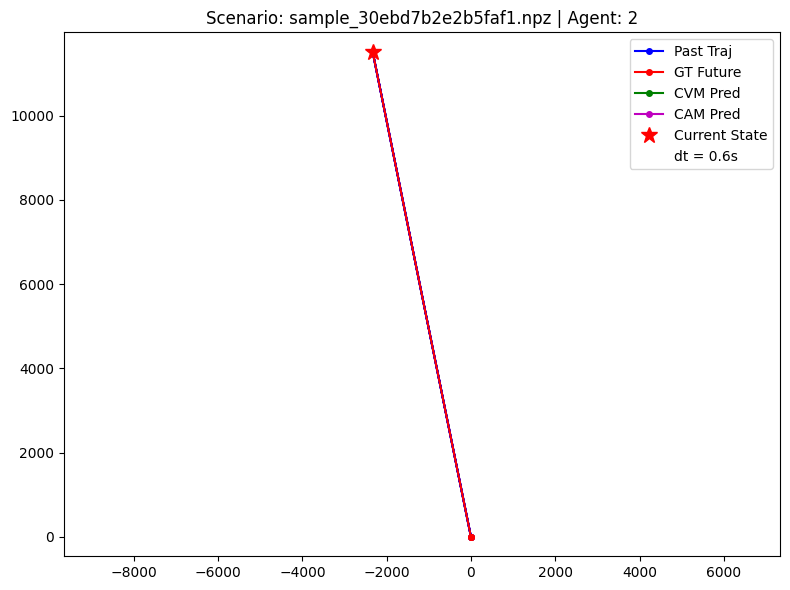

Scenario 2/10 - File: sample_e9b95352cc566fa2.npz, agent=1
  Constant Velocity Model: ADE=4.627, FDE=8.405
  Accelerated Model: ADE=3.766, FDE=6.205


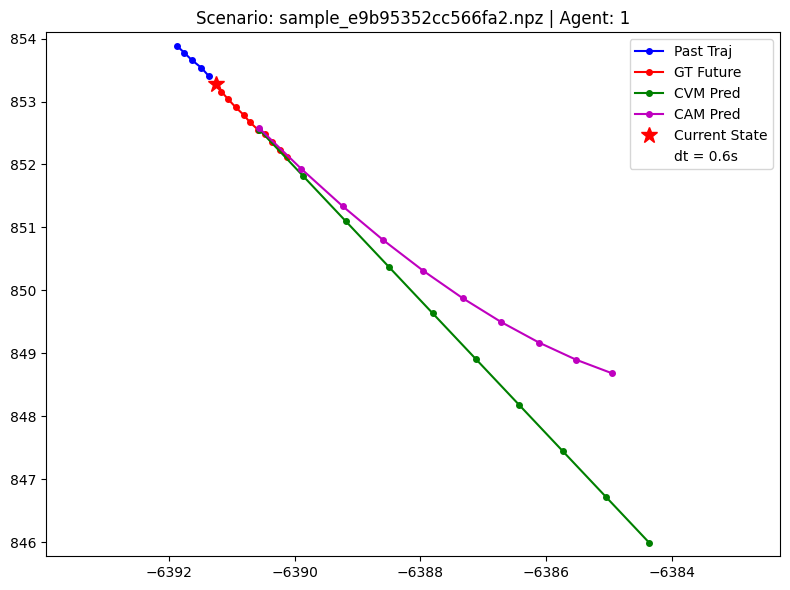

Scenario 3/10 - File: sample_48521d18fdc13c95.npz, agent=0
  Constant Velocity Model: ADE=2.319, FDE=4.247
  Accelerated Model: ADE=1.207, FDE=2.865


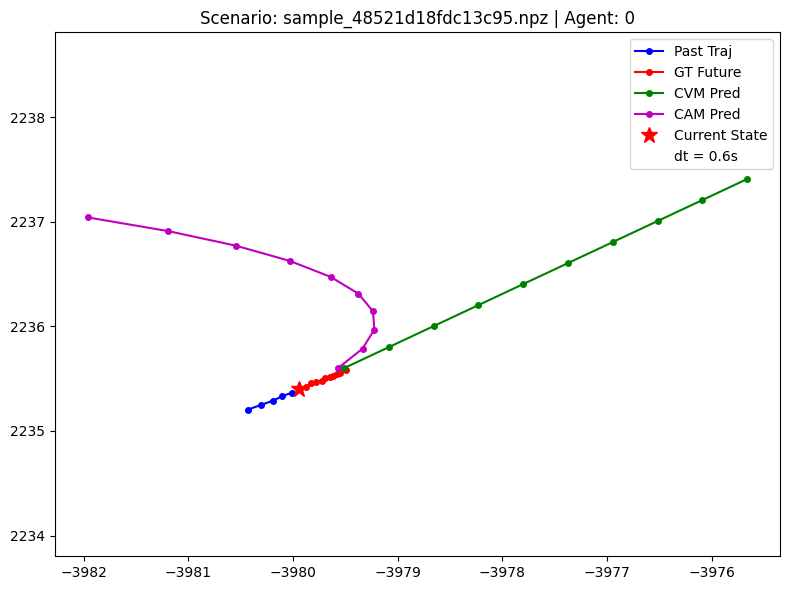

Scenario 4/10 - File: sample_a7e2cd254e70eef6.npz, agent=1
  Constant Velocity Model: ADE=55.844, FDE=101.572
  Accelerated Model: ADE=56.009, FDE=102.001


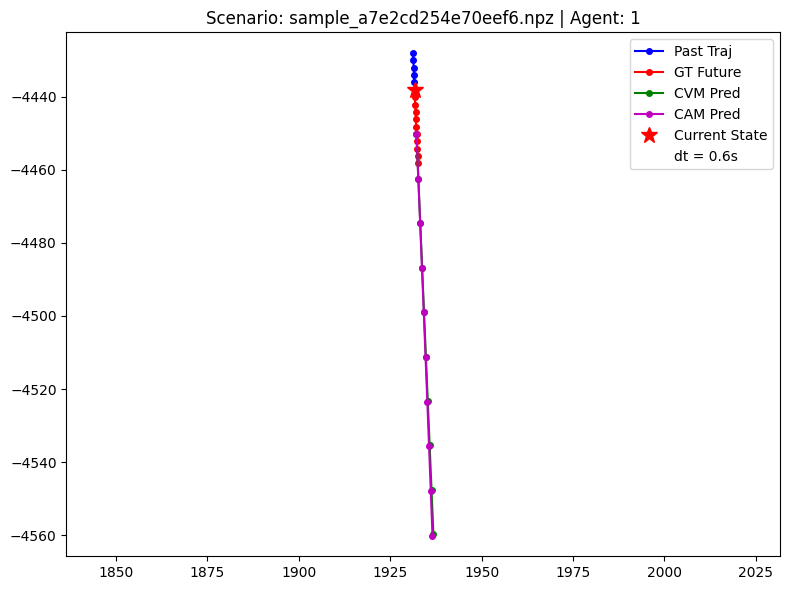

Scenario 5/10 - File: sample_45e4a8b8524eb71b.npz, agent=1
  Constant Velocity Model: ADE=20.250, FDE=37.076
  Accelerated Model: ADE=19.003, FDE=33.841


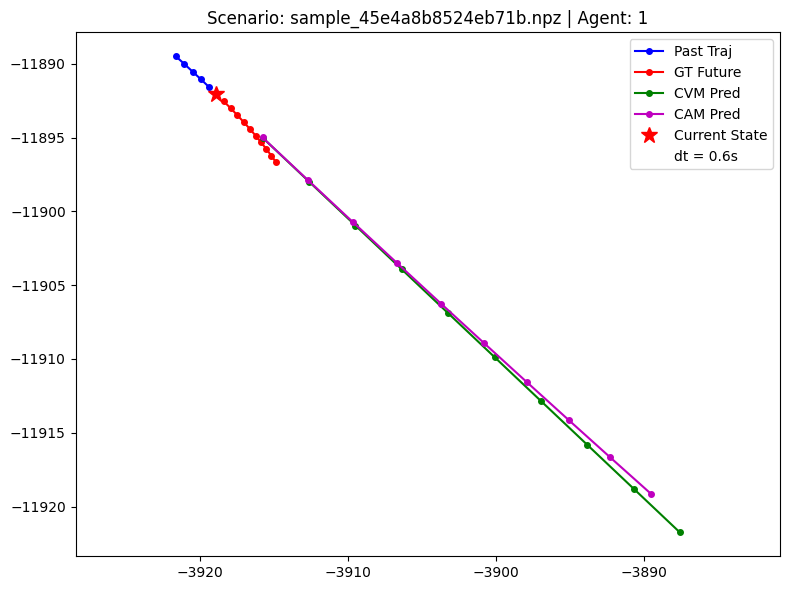

Scenario 6/10 - File: sample_371a64917512b4c9.npz, agent=71
  Constant Velocity Model: ADE=2.616, FDE=4.795
  Accelerated Model: ADE=2.426, FDE=4.399


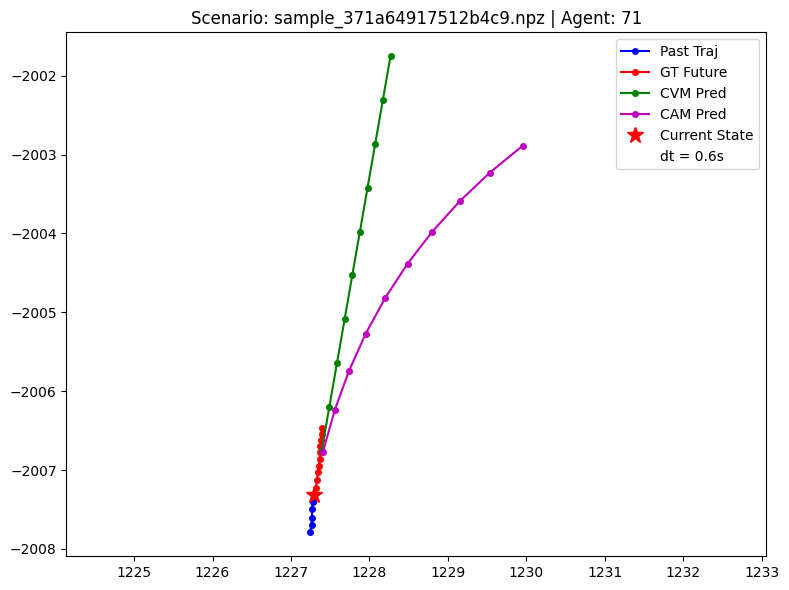

Scenario 7/10 - File: sample_ba0ab71d86896e7e.npz, agent=7
  Constant Velocity Model: ADE=36.021, FDE=65.512
  Accelerated Model: ADE=37.915, FDE=70.494


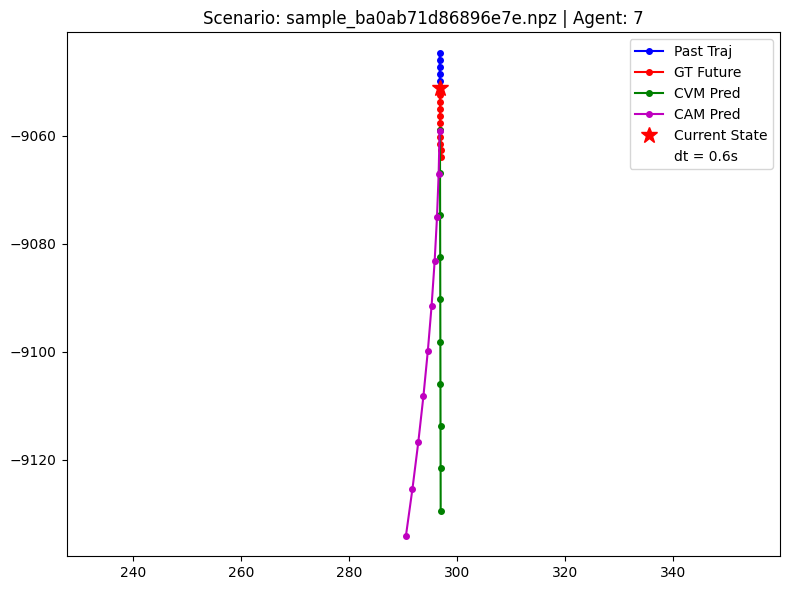

Scenario 8/10 - File: sample_3b523aceb232aa6f.npz, agent=5
  Constant Velocity Model: ADE=10.688, FDE=19.342
  Accelerated Model: ADE=13.933, FDE=27.922


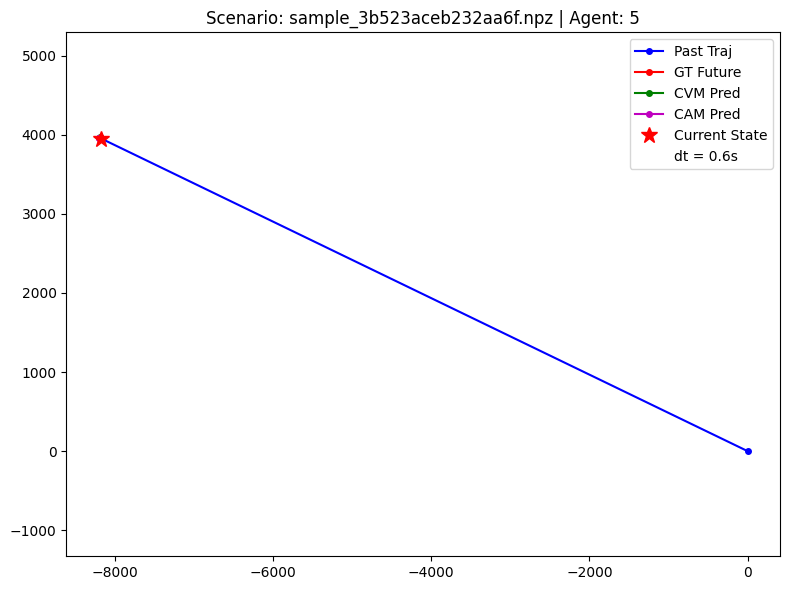

Scenario 9/10 - File: sample_7fcb65089a2bb672.npz, agent=22
  Constant Velocity Model: ADE=2.851, FDE=5.134
  Accelerated Model: ADE=1.557, FDE=2.167


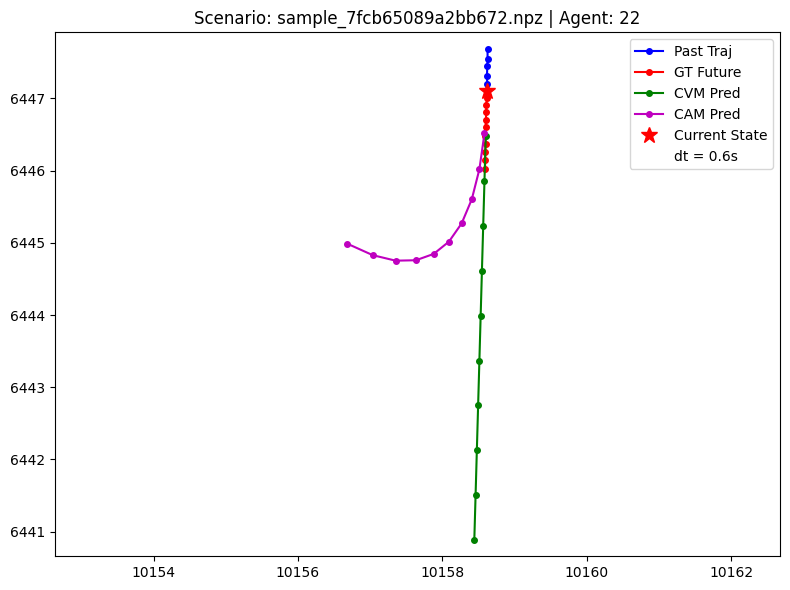

Scenario 10/10 - File: sample_6599b8d6132c1f75.npz, agent=4
  Constant Velocity Model: ADE=58.869, FDE=107.120
  Accelerated Model: ADE=59.278, FDE=108.193


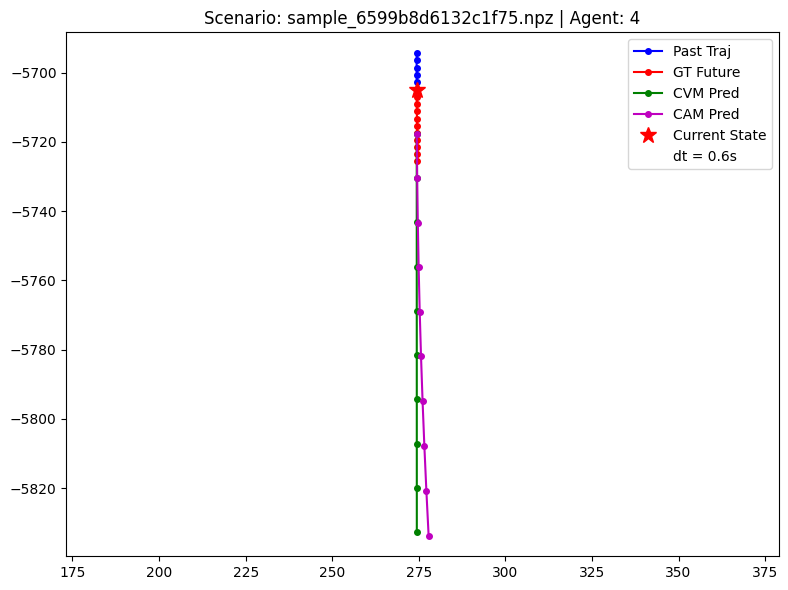

In [7]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# -------------------------- Configuration --------------------------
data_path = 'task2_data'   # Folder containing scenario data files
num_scenarios_to_sample = 10   # Number of scenarios to randomly sample
dt = 0.6                  # Time step (s), adjust according to your data sampling rate
past_frames = 5             # Number of past frames for visualizing history trajectory
predict_horizon = 10        # Number of future frames to predict (future trajectory)
# ----------------------------------------------------------

all_files = [f for f in os.listdir(data_path) if f.endswith('.npz')]
assert len(all_files) >= num_scenarios_to_sample, \
    "Not enough scenario files. Please ensure there are at least {} npz files in the folder.".format(num_scenarios_to_sample)

# Randomly select num_scenarios_to_sample scenario files
sampled_files = random.sample(all_files, num_scenarios_to_sample)

for scenario_idx, file_name in enumerate(sampled_files, start=1):
    # Load scenario data
    info = np.load(os.path.join(data_path, file_name), allow_pickle=True)
    
    # all_agent_trajs shape: (Na, T, 10), where Na is the number of agents and T is the total number of frames
    all_agent_trajs = info['all_agent']  
    # predict_list contains the indices of agents to predict
    tracks = info['predict_list']
    
    # Skip if there are no agents to predict in the scenario
    if len(tracks) == 0:
        print(f"[Scenario {file_name}] No agents to predict, skipping...")
        continue
    
    # Randomly select an agent index
    chosen_agent_idx = random.choice(tracks)
    
    # ------------------ Define the time range to inspect ------------------
    current_t = 9  # Current frame index
    start_past_t = current_t - past_frames  # Start of history
    end_past_t   = current_t               # End of history (exclusive)
    start_fut_t  = current_t + 1           # Start of future
    end_fut_t    = current_t + 1 + predict_horizon  # End of future (exclusive)
    
    # Check for time range overflow
    T_total = all_agent_trajs.shape[1]  # Total number of frames in the scenario
    if start_past_t < 0 or end_fut_t > T_total:
        print(f"[Scenario {file_name}] The selected past_frames or predict_horizon is out of range, skipping...")
        continue
    
    # Extract the agent's trajectory in these frames
    # agent_traj shape: (T_total, 10), each frame's info: [x, y, z, bbox_x, bbox_y, bbox_z, heading, vx, vy, valid]
    agent_traj = all_agent_trajs[chosen_agent_idx]
    
    # Past trajectory
    past_traj = agent_traj[start_past_t:end_past_t]  # shape: (past_frames, 10)
    # Ground truth for future
    future_gt  = agent_traj[start_fut_t:end_fut_t]   # shape: (predict_horizon, 10)
    # Current frame (used to get initial velocity/position, etc.)
    current_state = agent_traj[current_t]
    # Previous frame (used to calculate acceleration)
    prev_state = agent_traj[current_t - 1]
    
    # ------------------ Constant Velocity Prediction ------------------
    if current_state[9] != 1:
        print(f"[Scenario {file_name}] agent={chosen_agent_idx} current frame is invalid, prediction might fail.")
        continue
    
    x0, y0 = current_state[0], current_state[1]
    vx0, vy0 = current_state[7], current_state[8]
    
    pred_traj_cv = np.zeros((predict_horizon, 2))  # Store constant velocity prediction (x,y)
    for i in range(predict_horizon):
        t_sec = (i+1) * dt
        pred_x = x0 + vx0 * t_sec
        pred_y = y0 + vy0 * t_sec
        pred_traj_cv[i] = [pred_x, pred_y]
    
    # ------------------ Accelerated Model Prediction ------------------
    if prev_state[9] == 1:
        ax_val = (vx0 - prev_state[7]) / dt
        ay_val = (vy0 - prev_state[8]) / dt
    else:
        ax_val, ay_val = 0.0, 0.0
    
    pred_traj_acc = np.zeros((predict_horizon, 2))
    for i in range(predict_horizon):
        t_sec = (i+1) * dt
        pred_x = x0 + vx0 * t_sec + 0.5 * ax_val * (t_sec**2)
        pred_y = y0 + vy0 * t_sec + 0.5 * ay_val * (t_sec**2)
        pred_traj_acc[i] = [pred_x, pred_y]
    
    # ------------------ Calculate errors (ADE/FDE) ------------------
    gt_xy = future_gt[:, :2]  # Center point for each future frame (predict_horizon, 2)
    valid_mask = (future_gt[:, 9] == 1)
    
    errors_cv = np.linalg.norm(pred_traj_cv - gt_xy, axis=-1)
    errors_cv = np.where(valid_mask, errors_cv, np.nan)
    ADE_cv = np.nanmean(errors_cv)
    FDE_cv = errors_cv[-1]
    
    errors_acc = np.linalg.norm(pred_traj_acc - gt_xy, axis=-1)
    errors_acc = np.where(valid_mask, errors_acc, np.nan)
    ADE_acc = np.nanmean(errors_acc)
    FDE_acc = errors_acc[-1]
    
    print(f"Scenario {scenario_idx}/{num_scenarios_to_sample} - File: {file_name}, agent={chosen_agent_idx}")
    print(f"  Constant Velocity Model: ADE={ADE_cv:.3f}, FDE={FDE_cv:.3f}")
    print(f"  Accelerated Model: ADE={ADE_acc:.3f}, FDE={FDE_acc:.3f}")
    
    # ------------------ Plotting ------------------
    plt.figure(figsize=(8, 6), dpi=100)
    plt.title(f"Scenario: {file_name} | Agent: {chosen_agent_idx}")
    
    # Change marker size from 6 to 4
    p1, = plt.plot(past_traj[:, 0], past_traj[:, 1], '-bo', markersize=4, label="Past Traj")
    p2, = plt.plot(future_gt[:, 0], future_gt[:, 1], '-ro', markersize=4, label="GT Future")
    p3, = plt.plot(pred_traj_cv[:, 0], pred_traj_cv[:, 1], '-go', markersize=4, label="CVM Pred")
    p4, = plt.plot(pred_traj_acc[:, 0], pred_traj_acc[:, 1], '-mo', markersize=4, label="CAM Pred")
    
    # Mark the current state with a red star without connecting lines (only marker)
    p5, = plt.plot(current_state[0], current_state[1], marker='*', markersize=12, color='red',
                   linestyle='None', label="Current State")
    
    # Create a dummy handle for displaying dt info in the legend
    dt_handle = mlines.Line2D([], [], linestyle='None', marker='',
                              label=f"dt = {dt}s")
    
    # Collect all handles and add the dt handle to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    handles.append(dt_handle)
    labels.append(f"dt = {dt}s")
    
    plt.legend(handles=handles, labels=labels)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    # plt.savefig(f"scenario_{file_name}_agent_{chosen_agent_idx}.png")
    plt.close()


### Disscussions

First of all, whether it is a Constant Velocity Model (CVM) or a Constant Acceleration Model (CAM), when the prediction time is extended from 3 seconds to 5 seconds, and then to 8 seconds, the ADE and FDE are constantly increasing. This match the actual situation: the longer the prediction time, the higher the uncertainty, and the error will increase accordingly. The overall errors of CVM is smaller which implies that under given scenarios and data sets, the prediction accuracy of the constant velocity model is significantly better than that of the constant acceleration model. Agent's velocity tends to be relatively stable in a short time period, and the simple assumption of constant velocity could be more appropriate in such situation. The CAM assumes that the target will accelerate constantly, but the acceleration changes more frequently in reality, resulting in greater prediction errors. This could also mean that the dataset are mostly in the straight road that the use of CAM could lead the agent out of the road. The scene features can affect the performance of the model greatly. 

The above arguments can be explicitly represented by the example of a scenario shown in figure below. 

![example](visualization_discussions\ba0ab71d86896e7e.png)

We can see that the CVM performs extremely well on the straight road with a severe error of using CAM, while the CAM give a better prediction when the agent is turning, whereas the CVM prediction is off the road. The visualizations of other scenarios (given in the submitted folder) imply the similar patterns as discussed.